## Data Source

In [1]:
from src.data import BOCI
import pandas as pd


In [2]:
client = BOCI(21224)

|                           | 0               |
|:--------------------------|:----------------|
| Name                      | MBHK&CG@EC2412A |
| Stock Type                | Standard        |
| Type                      | Call            |
| Strike(HKD)               | 6.880           |
| Break-Even Price          | 7.068           |
| Premium(%)                | 19.19 %         |
| Effective Gearing(X)      | 9.34 X          |
| Implied Volatility(%)     | 23.17 %         |
| Vega(%)                   | 8.54 %          |
| 30 Hist. Vol (30-days)(%) | 26.939 %        |
| Gearing(X)                | 31.54 X         |
| Maturity Date(D/M/Y)      | 03/12/2024      |
| Last Trading Date(D/M/Y)  | 27/11/2024      |
| Time to Maturity(Days)    | 235day(s)       |
| Conversion Ratio          | 1               |
| Moneyness                 | 16.02 OTM       |
| Board Lot                 | 1000            |
| Delta(%)                  | 29.62 %         |
| Outstanding Qty(M)        | 0.03      

/Users/pratham/Desktop/2024 projects/FinMath/src/data.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


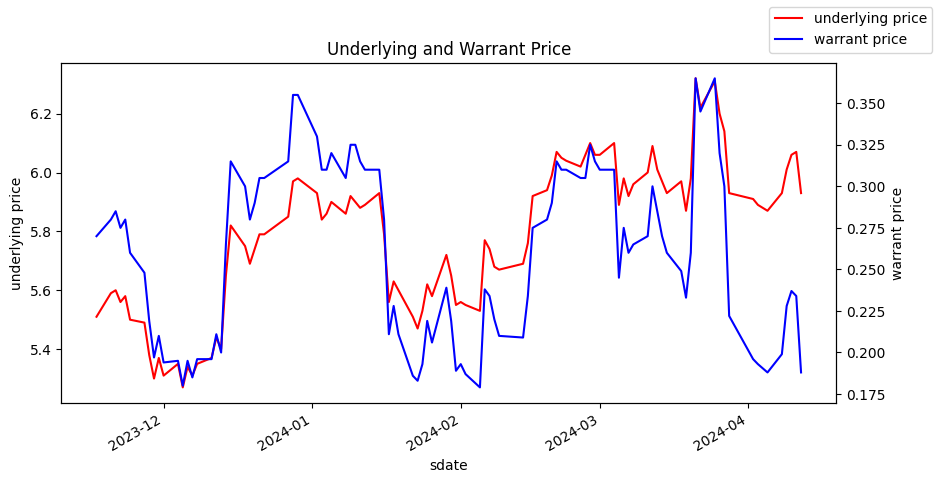

In [3]:
client.get_data()

## Hedging Portfolio

In [4]:
from src.hedge import HedgePortfolio

|                           | 0               |
|:--------------------------|:----------------|
| Name                      | MBHK&CG@EC2412A |
| Stock Type                | Standard        |
| Type                      | Call            |
| Strike(HKD)               | 6.880           |
| Break-Even Price          | 7.068           |
| Premium(%)                | 19.19 %         |
| Effective Gearing(X)      | 9.34 X          |
| Implied Volatility(%)     | 23.17 %         |
| Vega(%)                   | 8.54 %          |
| 30 Hist. Vol (30-days)(%) | 26.939 %        |
| Gearing(X)                | 31.54 X         |
| Maturity Date(D/M/Y)      | 03/12/2024      |
| Last Trading Date(D/M/Y)  | 27/11/2024      |
| Time to Maturity(Days)    | 235day(s)       |
| Conversion Ratio          | 1               |
| Moneyness                 | 16.02 OTM       |
| Board Lot                 | 1000            |
| Delta(%)                  | 29.62 %         |
| Outstanding Qty(M)        | 0.03      

/Users/pratham/Desktop/2024 projects/FinMath/src/data.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


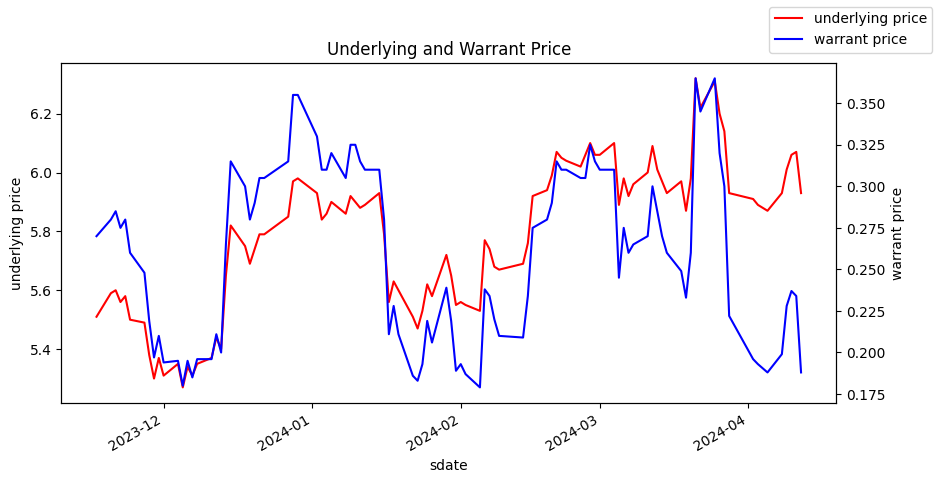

In [5]:
hedge = HedgePortfolio(client,0.04)

In [6]:
hedge.warrant.price_df.head()

,sdate,sdate2,ulast,wlast,wos,uturnover,wturnover
97,2024-04-12,12/04/2024,5.93,0.188,0,120.973,0.148431
96,2024-04-11,11/04/2024,6.07,0.234,0.03,167.618,0.1417
95,2024-04-10,10/04/2024,6.06,0.237,0.03,91.758496,0.05898
94,2024-04-09,09/04/2024,6.01,0.228,0.03,68.91,0.0457
93,2024-04-08,08/04/2024,5.93,0.199,0.03,75.8246,0.09224


In [7]:
hedge.summary() # Portofolio is None as not intialized

------Portfolio Summary------
Stock Units: None
Riskless Units: None
----------------------------


In [8]:
hedge.initialize_portfolio("09/04/2024") # initialize the portfolio with start dtae, ensure start date is a tradable day. If not provided, it will default to the last tradable day

Warrant price:  0.228
Calculating Implied Volatility


  2%|▏         | 2/100 [00:00<00:00, 1315.65it/s]

found on 2th iteration
difference is equal to 2.879697775515222e-07
Calculated Implied Volatility:  0.2450606060799391
------Portfolio Summary------
Stock Units: 0.32515556678576507
Riskless Units: -1.726184956382448
Current Portfolio Value: 0.22799999999999998
----------------------------


In [9]:
hedge.update_portfolio() # update the portfolio with the latest data from the market, it is self financing

Warrant price:  0.188
Calculating Implied Volatility


  2%|▏         | 2/100 [00:00<00:00, 2642.08it/s]

found on 2th iteration
difference is equal to -3.082660930281422e-05
Calculated Implied Volatility:  0.23864417889802406
------Portfolio Summary------
Stock Units: 0.2912797286888147
Riskless Units: -1.5253012364675322
Current Portfolio Value: 0.2019875546571388
----------------------------
